## .top file parser functions

In [414]:
def read_rawdata(file_nr):
    folder = "../Parameter files (.top)/"
    filename = "NVE_par_"+str(file_nr)+".top"
    filepath = folder + filename

    with open(filepath, 'rb') as f:
        rawdata = f.readlines()
    
    return rawdata    

In [369]:
"""
def get_param_value(data, key: str):
    index = data.find(key)
    
    # NB hardcoded read indexes, found by trial 
    OFFSET1 = 43
    OFFSET2 = -7
    
    value = float(data[index+OFFSET1+OFFSET2:index+OFFSET1])
    return value
"""

'\ndef get_param_value(data, key: str):\n    index = data.find(key)\n    \n    # NB hardcoded read indexes, found by trial \n    OFFSET1 = 43\n    OFFSET2 = -7\n    \n    value = float(data[index+OFFSET1+OFFSET2:index+OFFSET1])\n    return value\n'

In [415]:
import re
def get_param_value2(data, key: str):
    value = 0
    for line in data:
        if (" "+key+" ") in str(line):
            value = re.findall("\d+\.\d+", str(line))
    
    return float(value[0])

## Key data to read from .top file

In [416]:
## Interesting key data to read

# Elevation data
ELEVS = ["ELEV"+str(i) for i in range(11)]

# Evaporation per month
EVAPOS = ["EPJAN", "EPFEB", "EPMAR", "EPAPR", "EPMAY", "EPJUN", "EPJUL", "EPAUG", "EPSEP", "EPOKT", "EPNOV", "EPDES"]

# Other params 
OTHER = ["RCORR", "SCORR", "PGRAD", "TPGRAD"]

interesting_keys = [ELEVS, OTHER, EVAPOS]
# Flatten lists inside list
interesting_keys = [val for sublist in interesting_keys for val in sublist]

In [417]:
def read_interesting_params(file_nr, keys):
    data = read_rawdata(file_nr)
    params_dict = {}
    for key in keys: 
        params_dict[key] = get_param_value2(data, key)
    return params_dict

In [418]:
file_nr = 1
read_interesting_params(file_nr, interesting_keys)

{'ELEV0': 670.0,
 'ELEV1': 894.0,
 'ELEV2': 1023.0,
 'ELEV3': 1109.0,
 'ELEV4': 1196.0,
 'ELEV5': 1261.0,
 'ELEV6': 1304.0,
 'ELEV7': 1335.0,
 'ELEV8': 1361.0,
 'ELEV9': 1391.0,
 'ELEV10': 1534.0,
 'RCORR': 1.594,
 'SCORR': 1.768,
 'PGRAD': 0.05,
 'TPGRAD': 0.5,
 'EPJAN': 0.1,
 'EPFEB': 0.2,
 'EPMAR': 0.7,
 'EPAPR': 1.0,
 'EPMAY': 2.3,
 'EPJUN': 3.5,
 'EPJUL': 3.5,
 'EPAUG': 2.3,
 'EPSEP': 1.0,
 'EPOKT': 0.7,
 'EPNOV': 0.2,
 'EPDES': 0.1}

## NVE specific data loader function

In [419]:
# Read all input txt files
import glob
from typing import Tuple
import pandas as pd

def dateparse(dates, times):
    return [
        pd.datetime.strptime(date + time, "%d.%m.%Y%H:%M:%S")
        for date, time in zip(dates, times)
    ]

def load_forcing_and_discharge(catchment: int) -> Tuple[pd.DataFrame, int]:
    """Load the meteorological forcing data of a specific catchment.

    :param catchment: number (id)
    
    :return: pd.DataFrame containing the meteorological forcing data.
    """
    path = '../Input files (.txt)'
    all_files = glob.glob(path + "/*.txt")

    file_exist = False
    
    # Loop through files and find correct catchment
    for file_path in all_files:
        # Name is formatted `./Input files (.txt)/nve_inp_XX.txt`
        number = int(file_path.split('_')[-1].split('.')[0])
        
        if number == catchment:
            file_exist = True
            df = pd.read_csv(
                file_path, 
                encoding='cp1252', 
                skiprows=[0], 
                delimiter=r"\s+", 
                parse_dates=[['dd.mm.yyyy',  'hh:mm:ss']],
                date_parser=dateparse)
            df = df.rename(columns={"dd.mm.yyyy_hh:mm:ss": "timestamp"})
    
    # Return None if catchment does not exist
    if file_exist == False:
        print("Catchment does not exist")
        return None
    else:
        return df

In [420]:
print("Input file data:") 
load_forcing_and_discharge(file_nr)[0:31]

Input file data:


<ipython-input-419-70b93c67d154>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strptime(date + time, "%d.%m.%Y%H:%M:%S")


,timestamp,mm,grC,grC.1,m3/s
0,2000-01-01,3.30,-3.75,-3.75,0.27
1,2000-01-02,3.79,-2.02,-2.02,0.27
2,2000-01-03,6.98,-3.84,-3.84,0.27
3,2000-01-04,16.53,-3.80,-3.80,0.29
4,2000-01-05,4.44,-4.78,-4.78,0.31
5,2000-01-06,6.51,-2.75,-2.75,0.46
6,2000-01-07,13.87,-3.44,-3.44,0.44
7,2000-01-08,10.74,-1.23,-1.23,0.70
8,2000-01-09,16.58,-2.60,-2.60,0.51
9,2000-01-10,0.09,-4.47,-4.47,0.43


## Read Output, Simulated and Residuals data

In [421]:
import pandas as pd

def read_output_simulated_residual_data(file_nr):
    # Read raw csv
    folder = "../Residual, Output, Simulated data/"
    filename = "HBV_output_"+str(file_nr)+".txt"
    filepath = folder + filename
    
    df = pd.read_csv(filepath)
    
    # Rename columns to match LSTM notebook
    df = df.rename(columns={"DATE": "timestamp"})
    
    # Cast timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y/%m/%d', yearfirst=True)
    
    # Remove first column
    df = df.drop(['Unnamed: 0'], axis=1)
    
    return df

In [380]:
print("Residual file data:")
read_output_simulated_residual_data(file_nr)[0:31]

Residual file data:


,timestamp,OBSRUNOFF,SIMRUNOFF,RESIDUAL
0,2000-01-01,0.597,0.013,0.584
1,2000-01-02,0.597,0.055,0.542
2,2000-01-03,0.597,0.103,0.494
3,2000-01-04,0.641,0.177,0.464
4,2000-01-05,0.685,0.222,0.463
5,2000-01-06,1.016,0.252,0.764
6,2000-01-07,0.972,0.318,0.654
7,2000-01-08,1.547,0.610,0.937
8,2000-01-09,1.127,0.662,0.465
9,2000-01-10,0.950,0.662,0.288


## Merge parameter data with rainfall-runoff data

<ipython-input-419-70b93c67d154>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strptime(date + time, "%d.%m.%Y%H:%M:%S")


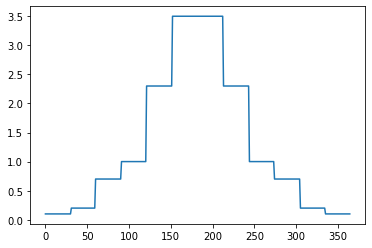

In [431]:
def generate_evapo_data(df):
    # Copies evapotranspiration given for a month to every days in the same month
    evapos = []
    for d in range(len(df)):
        # Calculate index based on month number
        month_idx = df["timestamp"][d].month - 1
        evapos.append(ip[EVAPOS[month_idx]])
        
    # Returns list                        
    return evapos  

import matplotlib.pyplot as plt
# Evapo plot for a year (simple model)
file_nr = 1
df = load_forcing_and_discharge(file_nr)
plt.plot(generate_evapo_data(df)[0:365])

<ipython-input-419-70b93c67d154>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strptime(date + time, "%d.%m.%Y%H:%M:%S")


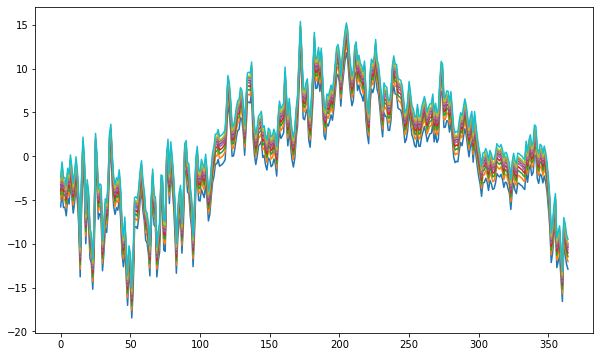

In [436]:
def generate_temp_data(df, params):
    temps = []
    for d in range(len(df)):
        # Loop through 10 distributed areas 
        elevation = []
        sum_height = params[ELEVS[0]]
        
        for i in range(10):
            # Calculate height of a given area by averaging lowest and highest height 
            height_low = params[ELEVS[i]]
            height_hig = params[ELEVS[i+1]]
            elevation.append((height_hig + height_low) / 2.0)
            
            sum_height += params[ELEVS[i+1]]
        
        # Find average height of catchment
        avg_height = sum_height / 11.0
        
        # Calculate elevation corrected temperature
        temp = []
        for i in range(10):
            temp.append(df["grC"][d] + params["TPGRAD"] * (elevation[i] - avg_height) / 100.0)
        temps.append(temp)    
    return temps

# Tempeature plot for a year (simple model) for all 10 areas
file_nr = 1
df = load_forcing_and_discharge(file_nr)
temps = generate_temp_data(df, params)
plt.figure(figsize=(10,6))
plt.plot(temps[0:365])

<ipython-input-419-70b93c67d154>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strptime(date + time, "%d.%m.%Y%H:%M:%S")


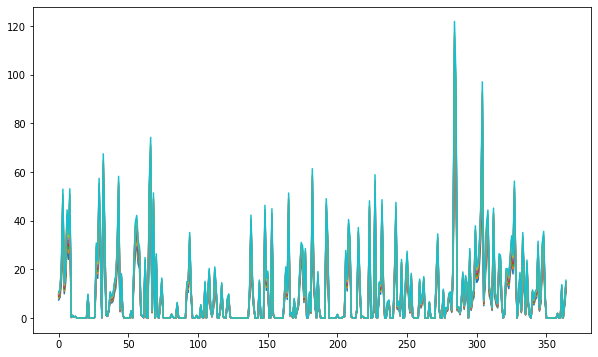

In [437]:
def generate_rain_data(df, params):
    rains = []
    for d in range(len(df)):
        # Loop through 10 distributed areas 
        elevation = []
        sum_height = params[ELEVS[0]]
        
        for i in range(10):
            # Calculate height of a given area by averaging lowest and highest height 
            height_low = params[ELEVS[i]]
            height_hig = params[ELEVS[i+1]]
            elevation.append((height_hig + height_low) / 2.0)
            
            sum_height += params[ELEVS[i+1]]
        
        # Find average height of catchment
        avg_height = sum_height / 11.0
        
        # Calculate elevation corrected rain
        rain = []
        for i in range(10):
            rain.append(params["RCORR"] * params["SCORR"] * df["mm"][d] * (1.0 + params["PGRAD"] * (elevation[i] - avg_height) / 100.0))
        rains.append(rain)
    return rains    

# Rain plot for a year (simple model) for all 10 areas
file_nr = 1
df = load_forcing_and_discharge(file_nr)
rains = generate_rain_data(df, params)
plt.figure(figsize=(10,6))
plt.plot(rains[0:365])

In [439]:
def add_param_data_to_df(df, params):
    # Add evapotranspiration
    df["evapo"] = generate_evapo_data(df)

    # Add temperature
    temps = generate_temp_data(df, params)
    for j in range(len(df)):
        for i in range(10):
            df["grC"+str(i+1)] = temps[j][i]

    # Add rain
    rains = generate_rain_data(df, params)
    for j in range(len(df)):
        for i in range(10):
            df["mm"+str(i+1)] = rains[j][i]
        
    return df

# Add evapo, temp (10 areas) and rain (10 areas)  
file_nr = 1
df = load_forcing_and_discharge(file_nr)
params = read_interesting_params(file_nr, interesting_keys)

df = add_param_data_to_df(df, params)
df.head()

<ipython-input-419-70b93c67d154>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strptime(date + time, "%d.%m.%Y%H:%M:%S")


,timestamp,mm,grC,grC.1,m3/s,evapo,grC1,grC2,grC3,grC4,...,mm1,mm2,mm3,mm4,mm5,mm6,mm7,mm8,mm9,mm10
0,2000-01-01,3.30,-3.75,-3.75,0.27,0.1,-3.324545,-2.442045,-1.904545,-1.472045,...,9.315995,10.348122,10.976755,11.482586,11.927014,12.242793,12.45916,12.62582,12.789557,13.295388
1,2000-01-02,3.79,-2.02,-2.02,0.27,0.1,-3.324545,-2.442045,-1.904545,-1.472045,...,9.315995,10.348122,10.976755,11.482586,11.927014,12.242793,12.45916,12.62582,12.789557,13.295388
2,2000-01-03,6.98,-3.84,-3.84,0.27,0.1,-3.324545,-2.442045,-1.904545,-1.472045,...,9.315995,10.348122,10.976755,11.482586,11.927014,12.242793,12.45916,12.62582,12.789557,13.295388
3,2000-01-04,16.53,-3.80,-3.80,0.29,0.1,-3.324545,-2.442045,-1.904545,-1.472045,...,9.315995,10.348122,10.976755,11.482586,11.927014,12.242793,12.45916,12.62582,12.789557,13.295388
4,2000-01-05,4.44,-4.78,-4.78,0.31,0.1,-3.324545,-2.442045,-1.904545,-1.472045,...,9.315995,10.348122,10.976755,11.482586,11.927014,12.242793,12.45916,12.62582,12.789557,13.295388


## Save to csv file

In [440]:
df.to_csv('rainfall_runoff_training_data.csv') 